In [1]:
###

In [20]:
%cd /content/drive/MyDrive/FaceMembersOfClass/

/content/drive/MyDrive/FaceMembersOfClass


In [21]:
#Tạo ra class ImageDataGenerator để chỉnh sửa ảnh
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range =0.2, horizontal_flip = True)

In [22]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/FaceMembersOfClass/Train', target_size = (150,150), batch_size = 32, class_mode ='categorical')

Found 372 images belonging to 7 classes.


In [23]:
training_set.class_indices

{'HoaiPhong': 0,
 'HongMinh': 1,
 'HuuLong': 2,
 'QuangHuy': 3,
 'TrongLuan': 4,
 'TrungHau': 5,
 'VietHa': 6}

In [24]:
#mo hinh CNN
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Normalization, Dropout
from keras.layers import LeakyReLU

In [25]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()

# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
#ham loai bo
model.add(LeakyReLU(alpha = 0.1))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))

# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', padding='same')) 
#ham loai bo
model.add(LeakyReLU(alpha = 0.1))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))

# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu',padding='same')) 
#ham loai bo
model.add(LeakyReLU(alpha = 0.1))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))


# Duỗi thẳng dữ liệu 
model.add(Flatten())

# Tạo lớp thứ nhất với 256 tín hiệu ra
model.add(Dense(256,activation='relu'))
# Tạo lớp thứ hai với 3 tín hiệu ra
model.add(Dense(7,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [26]:
from keras.utils import to_categorical # one hot encoding cho output
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size)
history=model.fit(training_set,epochs=50,batch_size=128,verbose=1)

Epoch 1/50
12/12 [==============================] - 189s 15s/step - loss: 3.2249 - accuracy: 0.2876
Epoch 2/50
12/12 [==============================] - 2s 199ms/step - loss: 0.5232 - accuracy: 0.8898
Epoch 3/50
12/12 [==============================] - 2s 198ms/step - loss: 0.1391 - accuracy: 0.9570
Epoch 4/50
12/12 [==============================] - 3s 249ms/step - loss: 0.0352 - accuracy: 0.9946
Epoch 5/50
12/12 [==============================] - 2s 200ms/step - loss: 0.0422 - accuracy: 0.9812
Epoch 6/50
12/12 [==============================] - 2s 198ms/step - loss: 0.0120 - accuracy: 0.9919
Epoch 7/50
12/12 [==============================] - 2s 207ms/step - loss: 0.0291 - accuracy: 0.9946
Epoch 8/50
12/12 [==============================] - 3s 227ms/step - loss: 0.0281 - accuracy: 0.9946
Epoch 9/50
12/12 [==============================] - 2s 203ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 10/50
12/12 [==============================] - 2s 201ms/step - loss: 0.0217 - accuracy: 0.9946

In [27]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 6.675376062048599e-05
Train Accuracy 1.0


<function matplotlib.pyplot.show(close=None, block=None)>

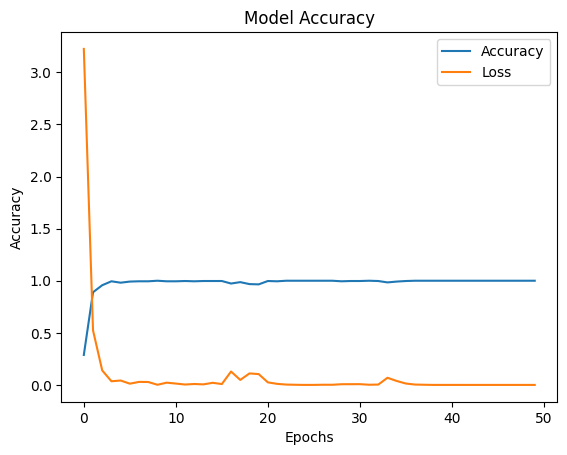

In [28]:
from matplotlib import pyplot as plt 
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Accuracy','Loss'])
plt.show

In [29]:
# Lưu lại
model.save("Ktr_face.h5")

In [30]:
from tensorflow.keras.models import load_model
# Tải mô hình 
model_CNN=load_model('Ktr_face.h5')

In [31]:
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import os
import numpy as np

1/1 [==============================] - 0s 72ms/step
TrongLuan


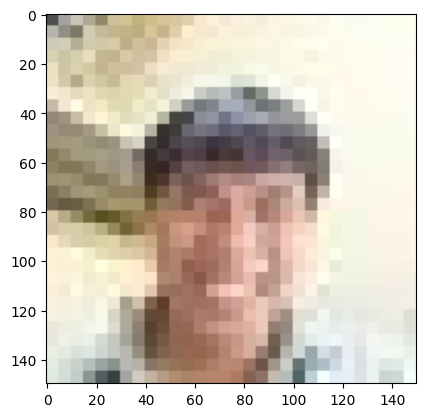

1/1 [==============================] - 0s 30ms/step
TrongLuan


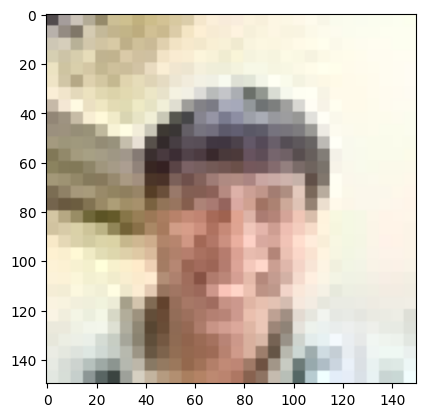

1/1 [==============================] - 0s 26ms/step
HuuLong


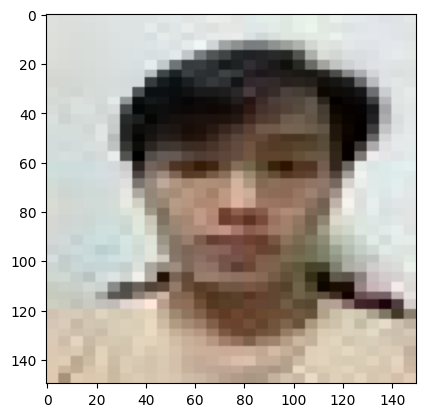

1/1 [==============================] - 0s 37ms/step
QuangHuy


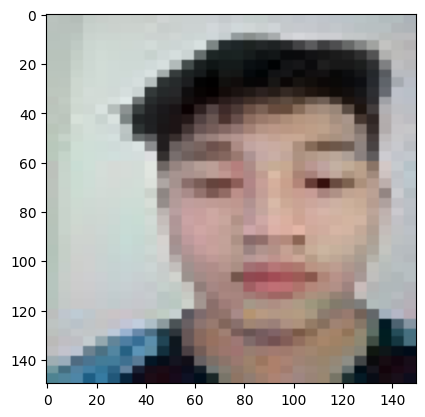

1/1 [==============================] - 0s 18ms/step
HuuLong


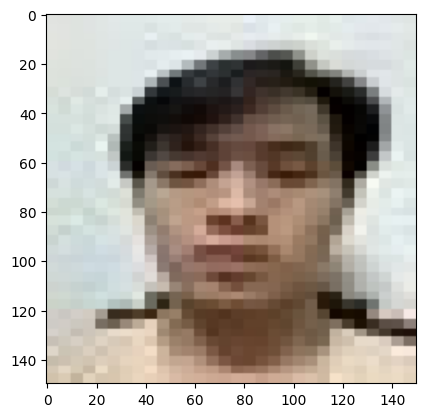

1/1 [==============================] - 0s 18ms/step
TrungHau


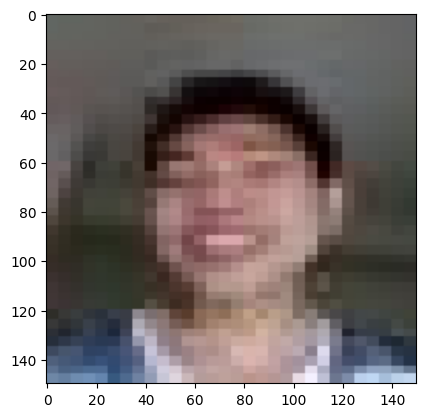

1/1 [==============================] - 0s 18ms/step
QuangHuy


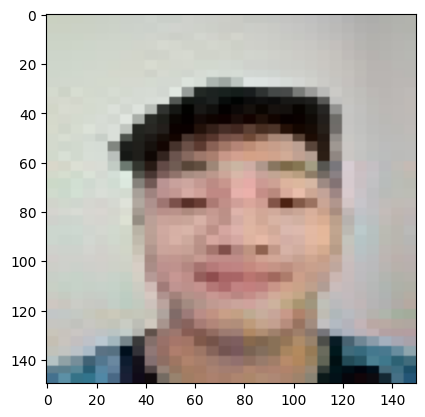

1/1 [==============================] - 0s 18ms/step
HongMinh


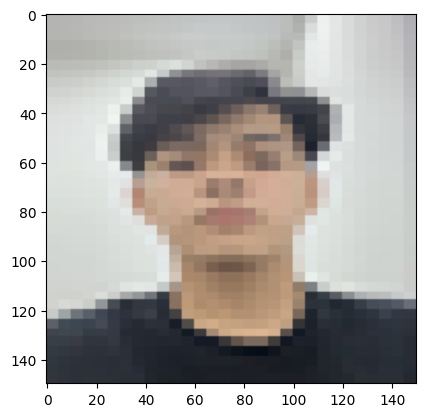

1/1 [==============================] - 0s 18ms/step
VietHa


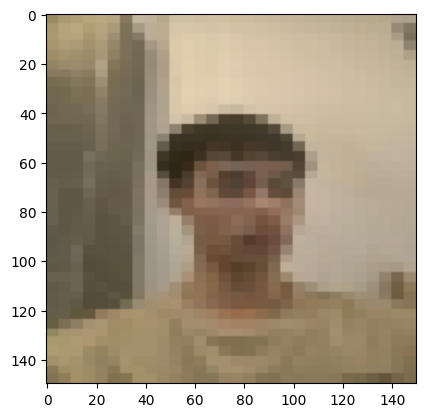

1/1 [==============================] - 0s 18ms/step
TrungHau


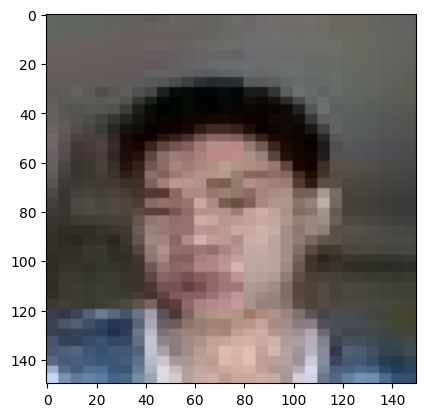

1/1 [==============================] - 0s 18ms/step
HongMinh


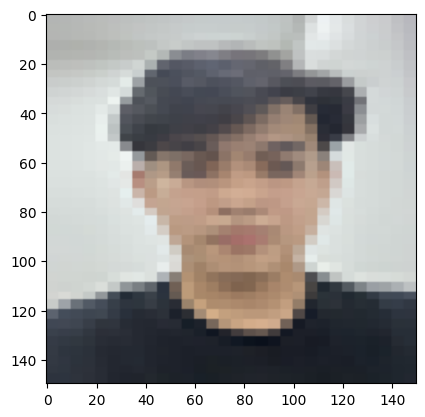

1/1 [==============================] - 0s 19ms/step
HoaiPhong


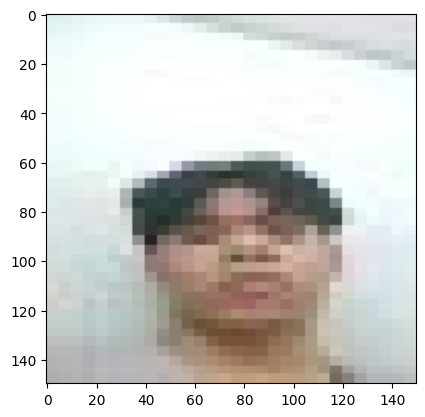

1/1 [==============================] - 0s 28ms/step
HoaiPhong


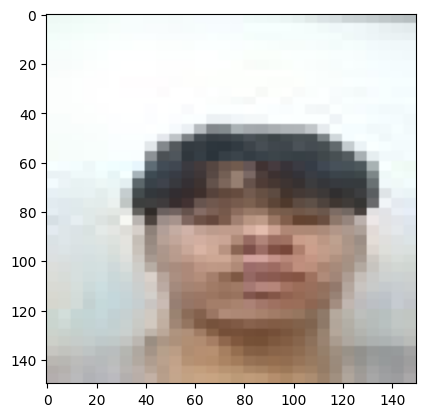

1/1 [==============================] - 0s 22ms/step
VietHa


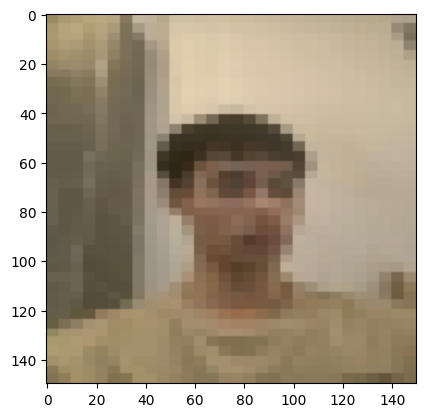

In [32]:
test="/content/drive/MyDrive/FaceMembersOfClass/Test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  
  result = int(np.argmax(model_CNN.predict(img),axis =1))

  class_name=['HoaiPhong','HongMinh','HuuLong','QuangHuy','TrongLuan','TrungHau','VietHa']
  
  print(class_name[result])
  plt.show()